### Three-Step Adams-Bashforth Method
Created on `2017-11-08`

### Disable auto-scrolling

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Introduction

$$ \dfrac{\partial{u}}{\partial{t}} = \kappa\dfrac{\partial^2{u}}{\partial{x^2}} $$

At each time step, $f_n$ is calculated by
$$ f_n = \kappa\dfrac{u^{j+1} - 2u^j + u^{j-1}}{(\Delta{X})^2} $$
where subscript $n$ is the time-step and superscript $j$ is spatial index.

** Condition of Stability **
$$ \Delta{T} \leq 0.5\frac{(\Delta{X})^2}{\kappa} $$

### Subroutines

In [2]:
from pylab import *
import seaborn as sns

set_printoptions(suppress=True)
sns.set(context="notebook", style="whitegrid")

def show_distribute(u, figtitle):
    """Can be used to plot either the
    initial condition or the final solution."""
    
    figure
    lb = 'Heat diffusivity: %f' % kappa
    plot(omega, u, label=lb)
    
    title(figtitle)
    xlabel('$x$')
    ylabel('$u(x)$')
    # axis('equal')
    xlim([0, 1])
    legend()
    
    show()
    
import os
import shutil

def save_all(outdir, skip=1, frames=300):
    # skip <type 'int'> how many frames to skip at each
    # frames <type 'int'> save the first i frames
    # if not enough, save the first len(u_all) frames
    
    # Prepare working directory.
    if os.path.isdir(outdir):
        shutil.rmtree(outdir)
        os.mkdir(outdir)
    else:
        os.mkdir(outdir)
    
    figure
    
    i = 0
    while i < min(frames, len(u_all)):
        filename = outdir + 'iter_%04d.png' % i
        
        clf()
        lb = 'Timestep: %f' % (i*dT)
        plot(omega, u_all[i], label=lb)
        
        title('Three-step AB solution to the heat diffusion equation')
        xlabel('$x$')
        ylabel('$u(x)$')
        legend()
        xlim([0,1])
        
        savefig(filename)
        i += skip
    
    print 'Done. Files saved as: %siter_xxxx.png' % outdir
    close()  # if a figure is not shown, it must be closed

### Subroutines and variables

In [3]:
N = 10
dX = 0.1
kappa = 0.01

# Calculate a valid timestep from spacing.
dT = 0.1 * dX * dX / kappa

# Boundary conditions.
omega = arange(0, N*dX, dX)
b_0, b_1 = 1.0, 0.0

def initial_profile(x):
    # x must be an np.array
    return 2.0 * x**2 - 3.0 * x + 1.0

u_0 = initial_profile(omega)
u_0 = transpose([u_0])
u_0[0], u_0[N-1] = b_0, b_1  # setup boundary conditions
u_all = [u_0]

def compute_fn(u):
    
    f_n = zeros([N, 1])
    f_n[0] = u[1] - 2.0 * u[0]
    f_n[N-1] = -2.0 * u[N-1] + u[N-2]
    
    for i in range(1, N-1):
        # rhs = u[i+1] - 2.0 * u[i] + u[i-1]
        # print type(rhs), size(rhs)
        f_n[i] = u[i+1] - 2.0 * u[i] + u[i-1]
        
    f_n = kappa * f_n / (dX * dX)
    
    return f_n

f_0 = compute_fn(u_0)
f_all = [f_0]

def perform_iter(imax=100000, tol=1e-5):
    
    # In the 1st time step (n = 0).
    u_1 = u_0 + dT / 12.0 * (23 * f_0)
    u_1[0], u_1[N-1] = b_0, b_1  # reset boundary conditions
    u_all.append(u_1)
    f_1 = compute_fn(u_1)
    f_all.append(f_1)
    
    # In the 2nd time step (n = 1).
    u_2 = u_1 + dT / 12.0 * (23 * f_1 - 16 * f_0)
    u_2[0], u_2[N-1] = b_0, b_1  # reset boundary conditions
    u_all.append(u_2)
    f_2 = compute_fn(u_2)
    f_all.append(f_2)
    
    # From the 3rd time step (n = 2, ..., n_iter-1).
    for n in range(2, imax):
        u_new = u_all[n] + dT / 12.0 * \
            (23 * f_all[n] - 16 * f_all[n-1] + 5 * f_all[n-2])
        u_new[0], u_new[N-1] = b_0, b_1  # reset boundary conditions
        
        u_diff = u_new - u_all[-1]  # examine difference before appending
        u_res = linalg.norm(u_diff, ord=2)  # absolute
        # u_res = linalg.norm(u_diff, ord=2) / linalg.norm(u_all[-1], ord=2)  # relative
        
        u_all.append(u_new)
        f_new = compute_fn(u_new)
        f_all.append(f_new)
        
        if u_res < tol:
            break
        else:
            continue
        
    if n == imax-1:
        print "Maximum number of iteration reached!"
    else:
        print 'Number of iterations:', (n+1)
        
    return u_all

### Show initial condition

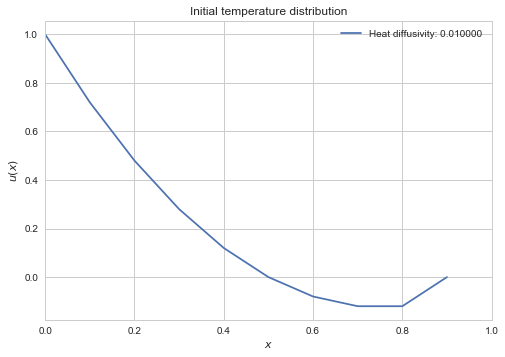

In [4]:
show_distribute(u_0, 'Initial temperature distribution')

### Run iterations

In [5]:
%%time

u_all = perform_iter()

Number of iterations: 588
CPU times: user 103 ms, sys: 1.6 ms, total: 104 ms
Wall time: 117 ms


### Show final solution

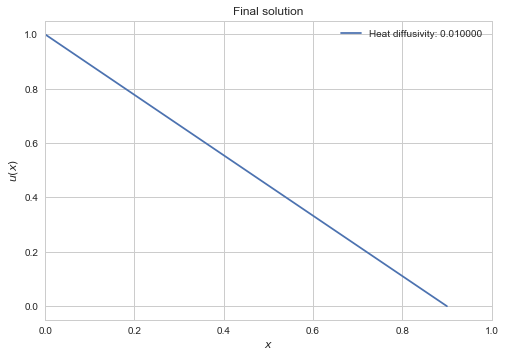

In [6]:
show_distribute(u_all[-1], 'Final solution')

### Try with different heat diffusivities

Number of iterations: 3960


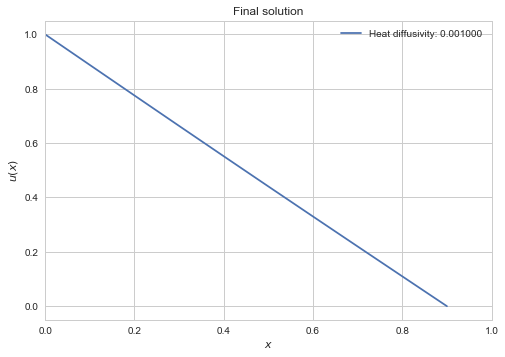

CPU times: user 1.07 s, sys: 15.7 ms, total: 1.09 s
Wall time: 1.12 s


In [7]:
%%time

# Initialize solutions.
u_all = [u_0]
f_all = [f_0]

kappa = 1e-3
u_all = perform_iter()
show_distribute(u_all[-1], 'Final solution')

Note that all tests are decreasing $\kappa$. If you increase $\kappa$, $\Delta{T}$ must be reduced to satisfy the condition of stability.

Number of iterations: 20492


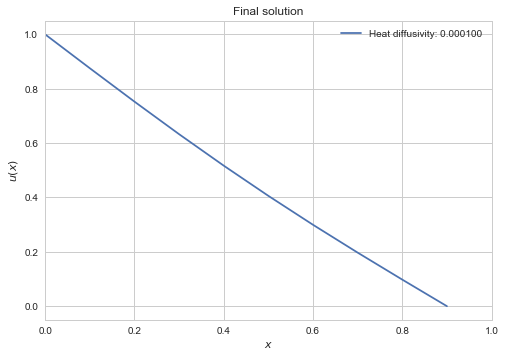

CPU times: user 3.84 s, sys: 39.9 ms, total: 3.88 s
Wall time: 3.92 s


In [8]:
%%time

# Initialize solutions.
u_all = [u_0]
f_all = [f_0]

kappa = 1e-4
u_all = perform_iter()
show_distribute(u_all[-1], 'Final solution')

### Plot an evolution history at $\kappa=0.01$

In [9]:
%%time

# Initialize solutions.
u_all = [u_0]
f_all = [f_0]

kappa = 0.01
u_all = perform_iter()
save_all('./exp_01/')

Number of iterations: 588
Done. Files saved as: ./exp_01/iter_xxxx.png
CPU times: user 1min 28s, sys: 1.29 s, total: 1min 29s
Wall time: 1min 32s


### Explore more complicated profile

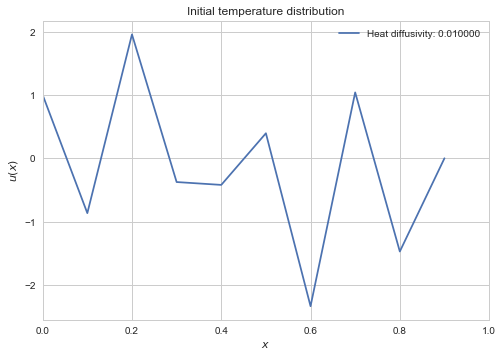

Number of iterations: 644
Done. Files saved as: ./exp_02/iter_xxxx.png
CPU times: user 1min 28s, sys: 1.27 s, total: 1min 30s
Wall time: 1min 31s


In [10]:
%%time

# Create new initial profile.
u_0 = randn(10)
u_0 = transpose([u_0])
u_0[0], u_0[N-1] = b_0, b_1  # setup boundary conditions
show_distribute(u_0, 'Initial temperature distribution')

# Initialize solutions.
u_all = [u_0]
f_all = [f_0]

u_all = perform_iter()
save_all('./exp_02/')